In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/restaurant.csv")

In [3]:
df.head()

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,WillWait
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


In [4]:
train, test = train_test_split(df, random_state=43)

In [5]:
train.head()

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,WillWait
8,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,No
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
10,No,No,No,No,None,$,No,No,Thai,0-10,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes


In [6]:
test.head()

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,WillWait
11,Yes,Yes,Yes,Yes,Full,$,No,No,Burger,30-60,Yes
6,No,Yes,No,No,None,$,Yes,No,Burger,0-10,No
7,No,No,No,Yes,Some,$$,Yes,Yes,Thai,0-10,Yes


In [7]:
train.shape, test.shape

((9, 11), (3, 11))

In [8]:
train['WillWait'].value_counts(normalize=True)

No     0.555556
Yes    0.444444
Name: WillWait, dtype: float64

In [9]:
train.describe()

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,WillWait
count,9,9,9,9,9,9,9,9,9,9,9
unique,2,2,2,2,3,3,2,2,4,4,2
top,Yes,No,No,Yes,Full,$,No,No,Thai,0-10,No
freq,5,5,5,5,5,5,7,5,3,4,5


In [10]:
test.describe()

,Alternate,Bar,Fri/Sat,Hungry,Patrons,Price,Raining,Reservation,Type,WaitEstimate,WillWait
count,3,3,3,3,3,3,3,3,3,3,3
unique,2,2,2,2,3,2,2,2,2,2,2
top,No,Yes,No,Yes,Full,$,Yes,No,Burger,0-10,Yes
freq,2,2,2,2,1,2,2,2,2,2,2


In [11]:
target = 'WillWait'

In [12]:
train_features = train.drop(columns=['WillWait'])

In [13]:
numerical_features = train_features.select_dtypes(include='number').columns.tolist()

In [14]:
cardinality = train_features.select_dtypes(exclude='number').nunique()

In [15]:
categorical_features = cardinality[cardinality<=50].index.tolist()

In [16]:
featues = numerical_features + categorical_features
print(featues)

['Alternate', 'Bar', 'Fri/Sat', 'Hungry', 'Patrons', 'Price', 'Raining', 'Reservation', 'Type', 'WaitEstimate']


In [17]:
X_train = train[featues]
y_train = train[target]
X_test = test[featues]
y_test = test[target]

### Decision Tree Classifier

In [18]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

In [19]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(random_state=42)
    )

In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Alternate', 'Bar', 'Fri/Sat', 'Hungry',
                                     'Patrons', 'Price', 'Raining',
                                     'Reservation', 'Type', 'WaitEstimate'],
                               use_cat_names=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [21]:
print('Train accuracy', pipeline.score(X_train, y_train))

Train accuracy 1.0


In [22]:
y_pred = pipeline.predict(X_test)

In [23]:
import graphviz
from sklearn.tree import export_graphviz

In [24]:
model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoder_columns = encoder.transform(X_train).columns

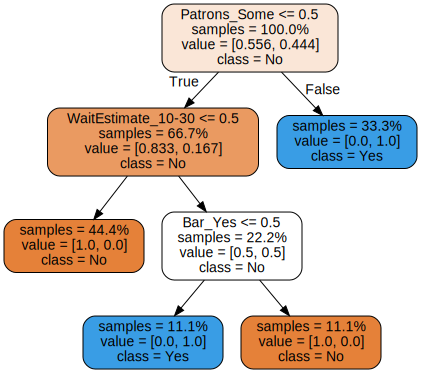

In [25]:
# dot_data = export_graphviz(model,
#                           out_file=None,
#                           max_depth=4,
#                           feature_names=encoder_columns,
#                           class_names=model.classes_,
#                           impurity=False,
#                           filled=True,
#                           proportion=True,
#                           rounded=False)

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_train).columns


dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=3, 
                           feature_names=encoded_columns,
                           class_names=model.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

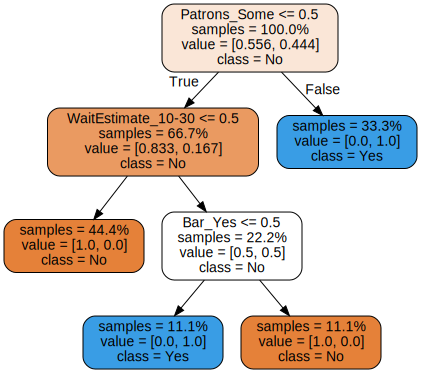

In [26]:
display(graphviz.Source(dot_data))

In [27]:
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from dtreeviz.trees import *
from sklearn.preprocessing import StandardScaler

In [28]:
encoder = ce.OneHotEncoder(use_cat_names=True)
imputer = SimpleImputer()
scaler = StandardScaler()

X_train_encoded = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)

In [29]:
X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)

In [30]:
clas = tree.DecisionTreeClassifier(max_depth=3)  
X_train = X_train_scaled
y_train = [0, 1, 1, 0,1,0,1,1,0]

y_train = np.array(y_train, dtype=np.float32)
clas.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
from sklearn import metrics

In [32]:
viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='WillWait',
               feature_names=encoded_columns, 
               class_names=[chr(c) for c in range(ord('0'),ord('9')+1)],
               histtype='bar')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [33]:
viz.view()

In [34]:
viz.save("final.svg")

In [35]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM

In [36]:
drawing = svg2rlg("final.svg")
renderPDF.drawToFile(drawing, "final.pdf")